In [1]:
# here we test the results of two platforms against each other 
# while running the same QASM file (take form benchmark datasets)
# - QASMBench
# - Tket benchmark dataset

In [3]:
import pandas as pd
import sys
sys.path.append("../lib")
import seaborn as sns
import matplotlib.pyplot as plt
from utils import iterate_over
from utils import load_config_and_check
import os

In [72]:
config = load_config_and_check("../config/experiment_v06.yaml")

In [68]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
from analyser import Explorer

In [73]:
exp = Explorer(config)

BENCHMARK: qasm_bench_mid - PROGRAM INFO - reading ...  
BENCHMARK: tket_bench_1 - PROGRAM INFO - reading ...  
BENCHMARK: qasm_bench_mid - EXECUTION INFO - reading ...  
BENCHMARK: tket_bench_1 - EXECUTION INFO - reading ...  
BENCHMARK: qasm_bench_mid - GROUND TRUTH - reading ...  
BENCHMARK: tket_bench_1 - GROUND TRUTH - reading ...  
BENCHMARK: qasm_bench_mid - DETECTOR: ../data/experiment_v06/qasm_bench_mid/predictions/ks - reading ...  
Reading: 8
Reading: 0
Reading: 4
Reading: 5
Reading: 1
Reading: 7
Reading: 2
Reading: 3
Reading: 10
Reading: 9
Reading: 6
BENCHMARK: tket_bench_1 - DETECTOR: ../data/experiment_v06/tket_bench_1/predictions/ks - reading ...  
Reading: 115
Reading: 101
Reading: 56
Reading: 79
Reading: 8
Reading: 100
Reading: 69
Reading: 19
Reading: 78
Reading: 39
Reading: 32
Reading: 89
Reading: 96
Reading: 58
Reading: 121
Reading: 94
Reading: 33
Reading: 0
Reading: 16
Reading: 30
Reading: 55
Reading: 34
Reading: 93
Reading: 119
Reading: 4
Reading: 111
Reading: 59
R

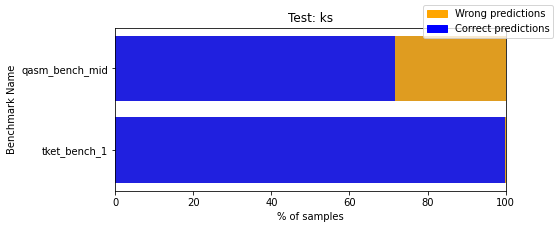

In [74]:
exp.classify_based_on_pvalue()
exp.focus_on_detector("ks")
exp.plot_benchmark_categories()

/home/paltenmo/.conda/envs/ML4Quantum/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:998: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


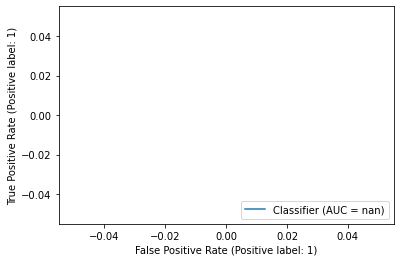

In [59]:
exp.plot_ROC()

In [7]:
FOLDER_DETECTOR = "../data/experiment_v06/qasm_bench_mid/predictions/ks"
FOLDER_INFO = "../data/experiment_v06/qasm_bench_mid/original_programs"

all_records = []

for filename, detector_res in iterate_over(FOLDER_DETECTOR, filetype=".json", parse_json=True):
    print(f"Reading: {filename}")
    # remove the comparison
    pairs = detector_res.pop('comparisons', None)
        
    for pair in pairs:
        new_record = {**pair, **detector_res}
        all_records.append(new_record)
        
df_detector_results = pd.DataFrame.from_records(all_records)

Reading: 8
Reading: 0
Reading: 4
Reading: 5
Reading: 1
Reading: 7
Reading: 2
Reading: 3
Reading: 10
Reading: 9
Reading: 6


In [12]:
df_detector_results.head()

,platform_a,platform_b,path_exec_a,path_exec_b,statistic,p_value,test,test_long_name,comparison_name,circuit_id,random_seed
0,cirq,qiskit,../data/experiment_v06/qasm_bench_mid/executio...,../data/experiment_v06/qasm_bench_mid/executio...,0.494385,0.0,ks,Kolmogorov–Smirnov Test,qasm_bench_mid,8,None
1,cirq,qiskit,../data/experiment_v06/qasm_bench_mid/executio...,../data/experiment_v06/qasm_bench_mid/executio...,0.499634,0.0,ks,Kolmogorov–Smirnov Test,qasm_bench_mid,8,None
2,cirq,qiskit,../data/experiment_v06/qasm_bench_mid/executio...,../data/experiment_v06/qasm_bench_mid/executio...,0.494385,0.0,ks,Kolmogorov–Smirnov Test,qasm_bench_mid,8,None
3,cirq,qiskit,../data/experiment_v06/qasm_bench_mid/executio...,../data/experiment_v06/qasm_bench_mid/executio...,0.492065,0.0,ks,Kolmogorov–Smirnov Test,qasm_bench_mid,8,None
4,cirq,qiskit,../data/experiment_v06/qasm_bench_mid/executio...,../data/experiment_v06/qasm_bench_mid/executio...,0.493530,0.0,ks,Kolmogorov–Smirnov Test,qasm_bench_mid,8,None


In [13]:
TOP_K = 20
print(f"TOP_K={TOP_K} most evident divergences")
df_grouped = df_detector_results.groupby(by=[
    "circuit_id", "comparison_name", "test", "platform_a", "platform_b"
]).median().sort_values(by="p_value").reset_index()
df_grouped.head(TOP_K)

TOP_K=20 most evident divergences


,circuit_id,comparison_name,test,platform_a,platform_b,statistic,p_value
0,8,qasm_bench_mid,ks,cirq,qiskit,0.488525,0.000000e+00
1,1,qasm_bench_mid,ks,cirq,qiskit,0.258911,1.214427e-241
2,4,qasm_bench_mid,ks,cirq,qiskit,0.102661,5.508902e-38
3,3,qasm_bench_mid,ks,cirq,qiskit,0.013794,4.169149e-01
4,7,qasm_bench_mid,ks,cirq,qiskit,0.012573,5.365621e-01
5,0,qasm_bench_mid,ks,cirq,qiskit,0.011841,6.140617e-01
6,2,qasm_bench_mid,ks,cirq,qiskit,0.008545,9.259451e-01
7,10,qasm_bench_mid,ks,cirq,qiskit,0.000000,1.000000e+00
8,5,qasm_bench_mid,ks,cirq,qiskit,0.000000,1.000000e+00
9,6,qasm_bench_mid,ks,cirq,qiskit,0.000000,1.000000e+00


In [9]:

records = list(zip(*iterate_over(FOLDER_INFO, filetype=".json", parse_json=True)))[1]
df_info = pd.DataFrame.from_records(records)
df_info.head()

,n_qubits,strategy_program_generation,circuit_id,benchmark_name
0,8,FamousCircuitGenerator,8,qasm_bench_mid
1,6,FamousCircuitGenerator,0,qasm_bench_mid
2,6,FamousCircuitGenerator,4,qasm_bench_mid
3,13,FamousCircuitGenerator,5,qasm_bench_mid
4,11,FamousCircuitGenerator,1,qasm_bench_mid


In [10]:
df_all = pd.merge(df_grouped, df_info, on="circuit_id")
df_all.head()

,circuit_id,statistic,p_value,n_qubits,strategy_program_generation,benchmark_name
0,8,0.488525,0.000000e+00,8,FamousCircuitGenerator,qasm_bench_mid
1,1,0.258911,1.214427e-241,11,FamousCircuitGenerator,qasm_bench_mid
2,4,0.102661,5.508902e-38,6,FamousCircuitGenerator,qasm_bench_mid
3,3,0.013794,4.169149e-01,15,FamousCircuitGenerator,qasm_bench_mid
4,7,0.012573,5.365621e-01,10,FamousCircuitGenerator,qasm_bench_mid


## Keep only qasm with less than 20 qubits

In [44]:
from utils import iterate_over
from qasm_manipulation import detect_registers

In [42]:
TKET_QASM = "../data/tket_benchmarking/arxiv-2003-10611/qasm_files"

In [54]:
# move programs under 20 bits in the tket folder
DEST_FOLDER = "../data/tket_benchmarking/executable_algos"

In [60]:
MEASURE_ALL = """
barrier q;
measure q -> c;
"""

In [66]:
executable_circuits = []
CUTOFF_QUBITS = 20
for filename, qasm_content in iterate_over(TKET_QASM, ".qasm", parse_json=False):
    #print(qasm_content)
    c_registers = detect_registers(qasm_content)
    quantum_bits = sum([
        reg[2]
        for reg in c_registers if reg[0] =='qreg' 
    ])
    
    if quantum_bits <= CUTOFF_QUBITS and len(c_registers) == 2:
        q_reg = [r for r in c_registers if r[1] == 'q']
        c_reg = [r for r in c_registers if r[1] == 'c']
        if (len(q_reg) > 0 and len(c_reg) > 0) and \
                (q_reg[0][1] == 'q' and q_reg[0][0] == 'qreg') and \
                (c_reg[0][1] == 'c' and c_reg[0][0] == 'creg') and \
                (c_reg[0][2] >= q_reg[0][2]):                 
            # save new file
            new_qasm = qasm_content + MEASURE_ALL
            print(c_registers)
            with open(os.path.join(DEST_FOLDER, f"{filename}.qasm"), 'w') as f:
                f.write(new_qasm)
                f.close()
            executable_circuits.append(f"{filename}.qasm")

[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('creg', 'c', 16)]
[('qreg', 'q', 16), ('cre

In [53]:
len(executable_circuits)

137

In [58]:
import shutil

for filename in executable_circuits:
    filepath = os.path.join(TKET_QASM, filename)
    destpath = os.path.join(DEST_FOLDER, filename)
    print(f"Moving: {filename}")
    #shutil.copyfile(filepath, destpath)

Moving: one-two-three-v1_99.qasm
Moving: 4gt12-v0_87.qasm
Moving: 4gt5_75.qasm
Moving: ham7_104.qasm
Moving: hwb5_53.qasm
Moving: sym9_146.qasm
Moving: pf2_20_after.qasm
Moving: 4gt4-v0_72.qasm
Moving: cnt3-5_180.qasm
Moving: 4mod5-v0_20.qasm
Moving: rd32_270.qasm
Moving: rd73_140.qasm
Moving: one-two-three-v2_100.qasm
Moving: 4mod5-v0_18.qasm
Moving: 4gt4-v0_79.qasm
Moving: rd84_142.qasm
Moving: pf2_10_after.qasm
Moving: 4gt12-v1_89.qasm
Moving: mod8-10_178.qasm
Moving: 4gt13_92.qasm
Moving: ising_model_10.qasm
Moving: dc1_220.qasm
Moving: ex-1_166.qasm
Moving: C17_204.qasm
Moving: ex2_227.qasm
Moving: ex3_229.qasm
Moving: radd_250.qasm
Moving: cm82a_208.qasm
Moving: majority_239.qasm
Moving: rd53_138.qasm
Moving: aj-e11_165.qasm
Moving: qft_10.qasm
Moving: pf4_10_after.qasm
Moving: sqrt8_260.qasm
Moving: rd53_133.qasm
Moving: 4mod5-v1_23.qasm
Moving: rd53_130.qasm
Moving: mod5d1_63.qasm
Moving: alu-v4_36.qasm
Moving: pm1_249.qasm
Moving: z4_268.qasm
Moving: ising_model_13.qasm
Moving